In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64")

C:\Users\vishw\AppData\Local\Temp\ipykernel_2616\3225216459.py:4: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64")


In [4]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


# Assignment 1: Plotting DataFrames

* Plot the `LodgingRevenue` and `OtherRevenue` columns in a line chart from the `monthly_revenue` DataFrame created below.  
* Make sure your x-axis is the `date` column.

In [5]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()

monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


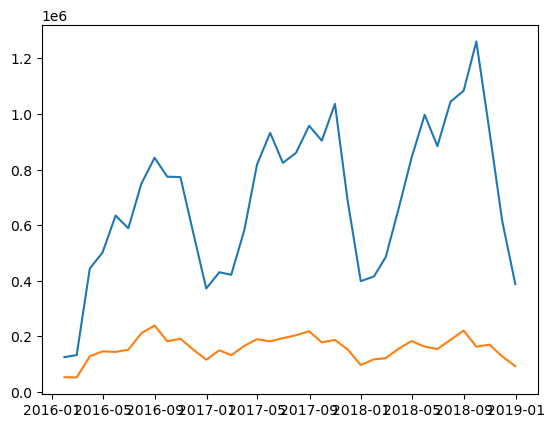

In [6]:
fig, ax= plt.subplots()

ax.plot(monthly_revenue.index, monthly_revenue["LodgingRevenue"])
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"])


plt.show()

# Assignment 2: Formatted Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Make sure to add titles and a y-axis label, remove the top and right borders, and add a legend.

Consider modifying the font sizes as well.

Thanks!

In [7]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()
monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


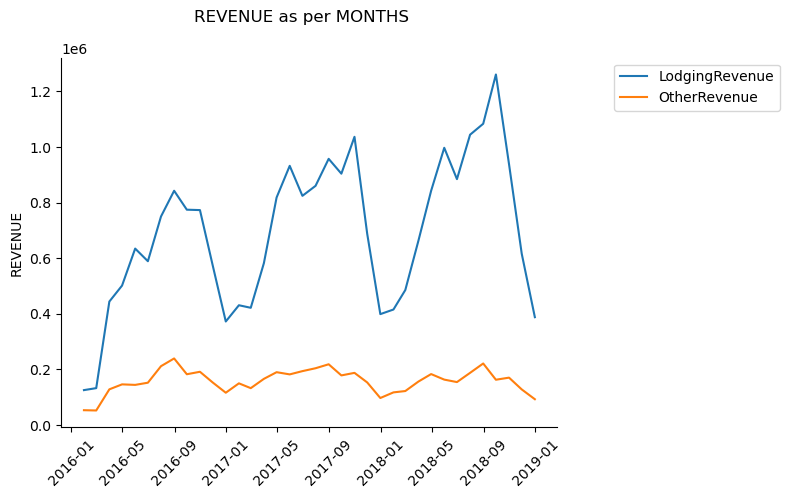

In [8]:
fig, ax=plt.subplots()
ax.plot(monthly_revenue.index,monthly_revenue["LodgingRevenue"])
ax.plot(monthly_revenue.index,monthly_revenue["OtherRevenue"])

fig.suptitle("REVENUE as per MONTHS")
ax.set_ylabel("REVENUE")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(["LodgingRevenue","OtherRevenue"],bbox_to_anchor=(1.1,1))

plt.xticks(rotation=45);

# Assignment 3: Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help). 

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.

Thanks!

*Note: I accidentally repeated the assignment numbers, but leaving as is to align with video numbering*

In [9]:
room_night = hotels.groupby("date").agg({"RoomNights":"sum","BookingsCanceled":"sum"})
quarterly_bookings = room_night.resample("Q").sum()

In [10]:
quarterly_bookings.head()

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12


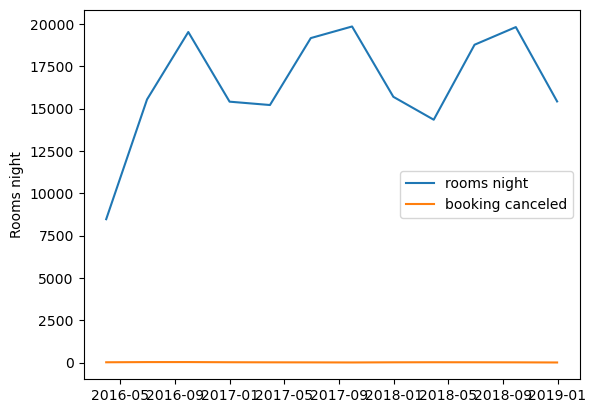

In [11]:
fig, ax = plt.subplots()
ax.plot(quarterly_bookings.index,quarterly_bookings["RoomNights"],label="rooms night")
ax.set_ylabel("Rooms night")
ax.plot(quarterly_bookings.index,quarterly_bookings["BookingsCanceled"],label="booking canceled")
ax.legend();

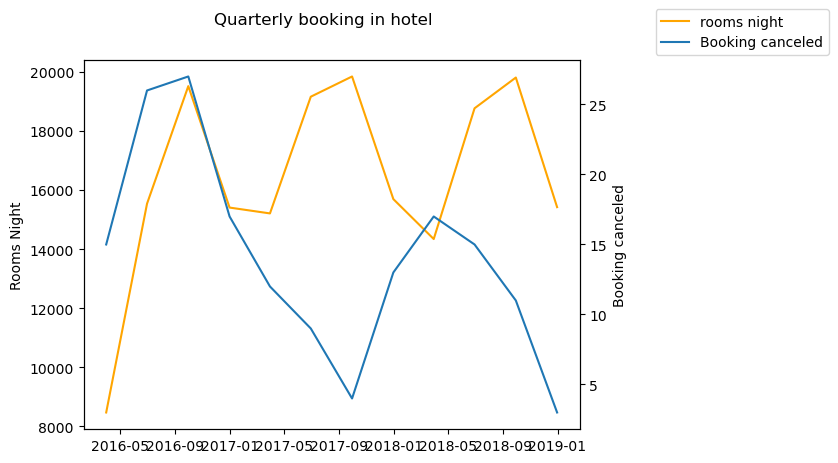

In [12]:
fig, ax = plt.subplots()
ax.plot(quarterly_bookings.index,quarterly_bookings["RoomNights"],label="rooms night",color="orange")
ax.set_ylabel("Rooms Night")

ax2 = ax.twinx()
ax2.plot(quarterly_bookings.index, quarterly_bookings["BookingsCanceled"],label="Booking canceled")
ax2.set_ylabel("Booking canceled")

fig.suptitle("Quarterly booking in hotel")
fig.legend(bbox_to_anchor=(1.3,1));


# Assignment 4: Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

In [13]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [14]:
countries = (hotels
            .groupby("Nationality")
            .agg({"RoomNights":"sum", "LodgingRevenue":"sum"})
            .sort_values("RoomNights",ascending=False)
            .iloc[:10])
countries.head()

,RoomNights,LodgingRevenue
Nationality,,
FRA,31018,3809315.59
DEU,26334,3113382.55
PRT,24334,2715008.72
GBR,20822,2693123.61
ESP,10877,1475909.33


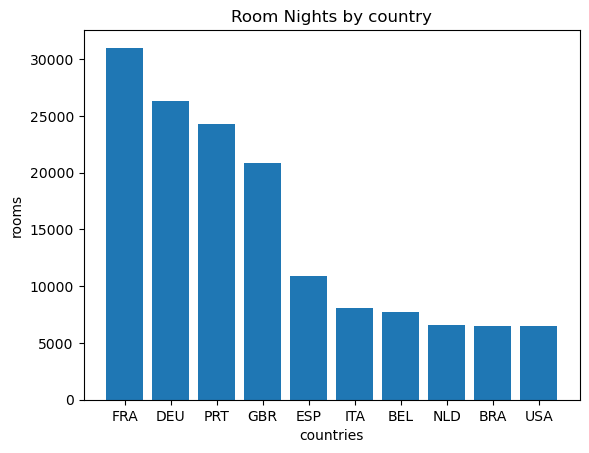

In [15]:
fig, ax=plt.subplots()

ax.bar(countries.index,countries["RoomNights"])
ax.set_title("Room Nights by country")
ax.set_ylabel("rooms")
ax.set_xlabel("countries");

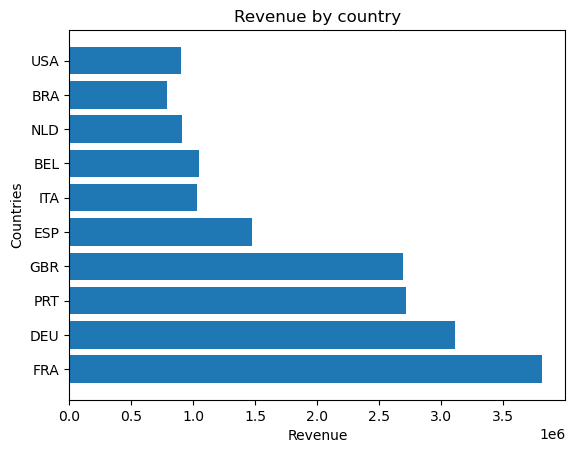

In [16]:
fig, ax=plt.subplots()

ax.barh(countries.index,countries["LodgingRevenue"])
ax.set_title("Revenue by country")
ax.set_ylabel("Countries")
ax.set_xlabel("Revenue");

# Assignment 5: Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries with LodgingRevenue and OtherRevenue as bars for each.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline. 

Thanks!

In [38]:
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]

country_subset = (hotels
                 .loc[hotels["Nationality"].isin(countries)]
                 .groupby("Nationality")
                 .agg({"LodgingRevenue":"sum","OtherRevenue":"sum"})
                 .sort_values("LodgingRevenue", ascending = False))

country_subset

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


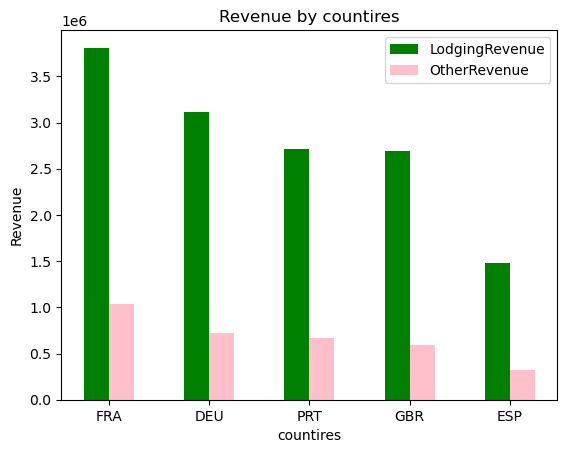

In [18]:
fig, ax=plt.subplots()
width=.25
x=np.arange(5)

ax.bar(x-width/2,
      country_subset["LodgingRevenue"],
      width=width,
      label="LodgingRevenue",
      color="green")
ax.bar(x+width/2,
      country_subset["OtherRevenue"],
      width=width,
      label="OtherRevenue",
      color="pink")
ax.set_xlabel("countires")
ax.set_ylabel("Revenue")
ax.set_title("Revenue by countires")
ax.set_xticks(x)
ax.set_xticklabels(country_subset.index)
ax.legend();

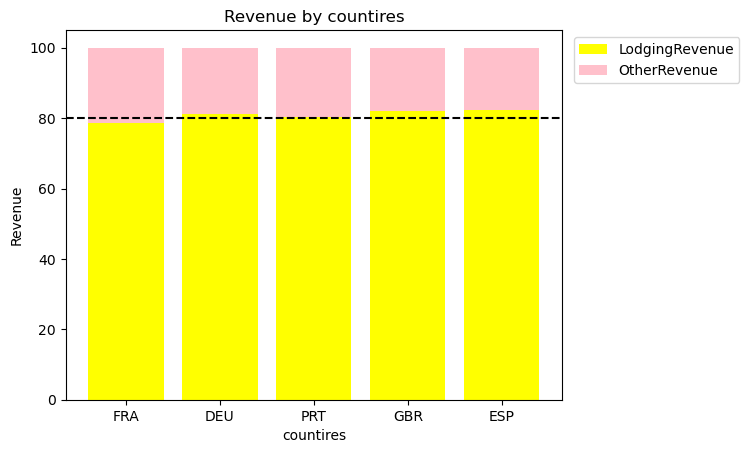

In [19]:
country_subset=country_subset.apply(lambda x: x*100/sum(x),axis=1)


fig, ax=plt.subplots()


ax.bar(country_subset.index,
      country_subset["LodgingRevenue"],
      label="LodgingRevenue",
      color="yellow")
ax.bar(country_subset.index,
      country_subset["OtherRevenue"],
      label="OtherRevenue",
      color="pink",
      bottom=country_subset["LodgingRevenue"])

ax.set_xlabel("countires")
ax.set_ylabel("Revenue")
ax.set_title("Revenue by countires")


ax.set_xticks(x)
ax.set_xticklabels(country_subset.index)

ax.legend(bbox_to_anchor=(1.01,1))

ax.axhline(80,color="black",ls="--");

# Assignment 6: Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

In [20]:
country_rev = country_subset

country_rev

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,78.664529,21.335471
DEU,81.100394,18.899606
PRT,80.310417,19.689583
GBR,81.999019,18.000981
ESP,82.189013,17.810987


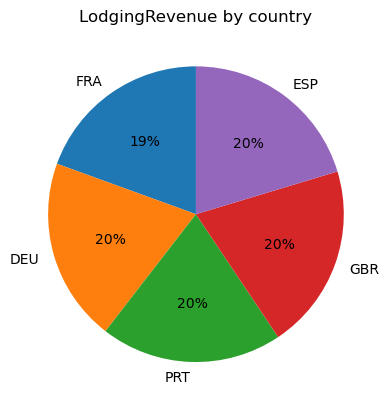

In [35]:
fig, ax=plt.subplots()
ax.pie(x=country_rev["LodgingRevenue"],
      startangle=90,
      labels=country_rev.index,
      autopct="%.0f%%")
ax.set_title("LodgingRevenue by country");

''

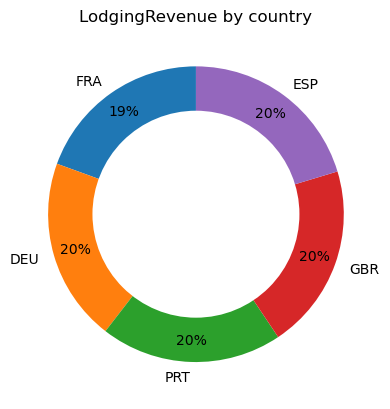

In [36]:
fig, ax=plt.subplots()
ax.pie(x=country_rev["LodgingRevenue"],
      startangle=90,
      labels=country_rev.index,
      autopct="%.0f%%",
      pctdistance=.85)

donut_hole=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(donut_hole)

ax.set_title("LodgingRevenue by country")
;

# Assignment 7: Scatterplots & Histograms

* Build a scatterplot comparing average nights stayed by country to average revenue per customer by country.
* Then, build a bubble chart by specifying the size of the bubbles as the average nightly revenue.
* Finally, build a histogram comparing customer age in Germany to the Customer age in france. Make sure to tweak your alpha!

Column Creation Code:

<mark style="background-color: black">
    hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])</mark>


Thanks!

In [37]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [42]:
scat_comp= (hotels
            .groupby("Nationality")
            .agg({"AverageLeadTime":"sum", "LodgingRevenue":"sum"})
            
           )

scat_comp.head()

,AverageLeadTime,LodgingRevenue
Nationality,,
ABW,394,1896.52
AGO,2073,96436.72
AIA,12,1164.60
ALB,1406,3455.90
AND,633,3107.40


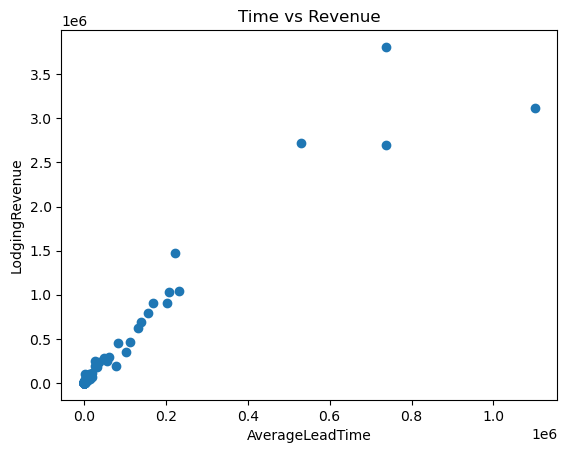

In [47]:
fig, ax=plt.subplots()
ax.scatter(scat_comp["AverageLeadTime"],
          scat_comp["LodgingRevenue"])
ax.set_title("Time vs Revenue")
ax.set_xlabel("AverageLeadTime")
ax.set_ylabel("LodgingRevenue");

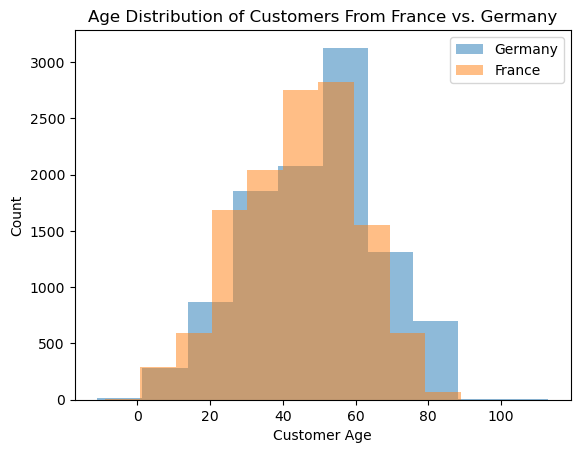

In [49]:
fig, ax = plt.subplots()

ax.hist(hotels.loc[hotels["Nationality"] == "DEU", "Age"], alpha=.5)
ax.hist(hotels.loc[hotels["Nationality"] == "FRA", "Age"], alpha=.5)

ax.set_title("Age Distribution of Customers From France vs. Germany")
ax.set_xlabel("Customer Age")
ax.set_ylabel("Count")

ax.legend(["Germany", "France"])

plt.show()